In [30]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [2]:
#cargar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Leer archivo csv desde drive
df=pd.read_csv('/content/drive/MyDrive/proyectocabildo/incidencias_full_limpio.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121712 entries, 0 to 121711
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   carretera_nombre         121712 non-null  object
 1   carretera_descripcion    121712 non-null  object
 2   tramo_nombre             121712 non-null  object
 3   tramo_descripcion        121712 non-null  object
 4   comunicacion_tipo        121712 non-null  object
 5   incidencia_fecha_inicio  121712 non-null  object
 6   incidencia_tipo          121712 non-null  object
 7   incidencia_subtipo       121712 non-null  object
 8   annio                    121712 non-null  int64 
 9   mes                      121712 non-null  int64 
 10  es_accidente             121712 non-null  object
dtypes: int64(2), object(9)
memory usage: 10.2+ MB


In [21]:
#Primero le aplicamos el formato a las graficas
# Configurar el estilo oscuro
sns.set(style="darkgrid")
plt.style.use("dark_background")

In [18]:
df['incidencia_fecha_inicio'] = pd.to_datetime(df['incidencia_fecha_inicio'], errors='coerce')


In [19]:
# Recalcular los datos de accidentes basados en el DataFrame actualizado

# Cálculo del número de accidentes por año
accidentes_por_annio = df[df['es_accidente'] == 'Accidente'].groupby('annio').size()

# Cálculo de la correlación entre Mes y Número de Accidentes
accidentes_por_mes = df[df['es_accidente'] == 'Accidente'].groupby('mes').size()

# Cálculo de la correlación entre Día de la Semana y Número de Accidentes
df['dia_semana'] = df['incidencia_fecha_inicio'].dt.day_name()
accidentes_por_dia_semana = df[df['es_accidente'] == 'Accidente'].groupby('dia_semana').size()

# Añadir columna de hora
df['hora'] = df['incidencia_fecha_inicio'].dt.hour
# Distribución de Accidentes por Hora del Día
accidentes_por_hora = df[df['es_accidente'] == 'Accidente'].groupby('hora').size()

# Número de accidentes por las 10 carreteras más afectadas
top_10_carreteras = df[df['es_accidente'] == 'Accidente'].groupby('carretera_nombre').size().nlargest(10)

<ipython-input-22-1cc62a661105>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidentes_por_annio.index, y=accidentes_por_annio.values, palette="Blues_r")


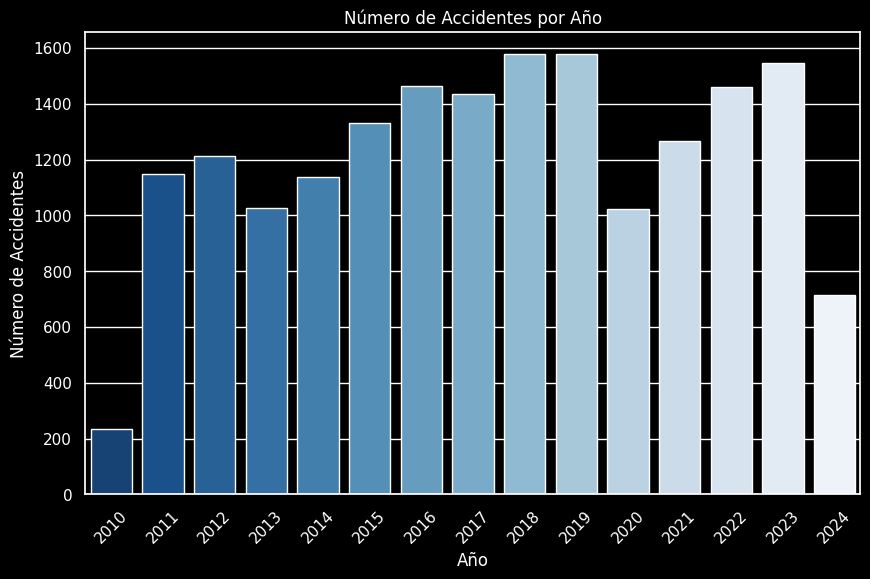

In [22]:
# Gráfico 1: Número de accidentes por año
plt.figure(figsize=(10, 6))
sns.barplot(x=accidentes_por_annio.index, y=accidentes_por_annio.values, palette="Blues_r")
plt.title('Número de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.show()


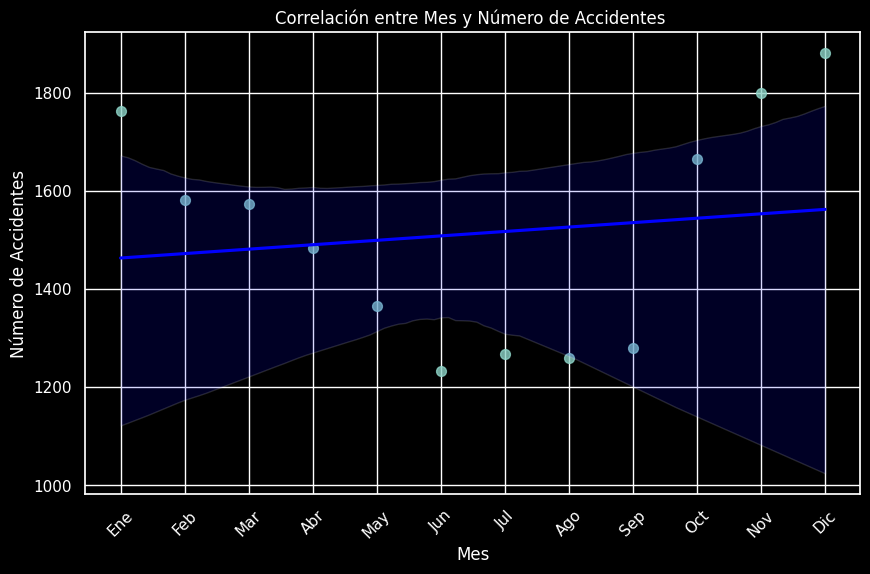

In [38]:
#Gráfico 2
# Filtrar las filas donde 'incidencia_tipo' es 'Accidentes'
df_accidentes = df[df['incidencia_tipo'] == 'Accidentes']

# Contar el número de accidentes por mes
accidentes_por_mes = df_accidentes['mes'].value_counts().sort_index()

# Crear un DataFrame con los datos
correlacion_df = pd.DataFrame({
    'mes': accidentes_por_mes.index,
    'accidentes': accidentes_por_mes.values
})

# Calcular la correlación
correlacion_accidentes = correlacion_df.corr()

# Crear un gráfico de dispersión para visualizar la correlación entre el mes y el número de accidentes
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.style.use("dark_background")

sns.regplot(x='mes', y='accidentes', data=correlacion_df, scatter_kws={'s':50}, line_kws={'color':'blue'})
plt.title('Correlación entre Mes y Número de Accidentes ')
plt.xlabel('Mes')
plt.ylabel('Número de Accidentes')

# Definir los nombres de los meses
plt.xticks(ticks=correlacion_df['mes'], labels=meses_nombres, rotation=45)
plt.grid(True)
plt.show()

correlacion_accidentes
plt.show()

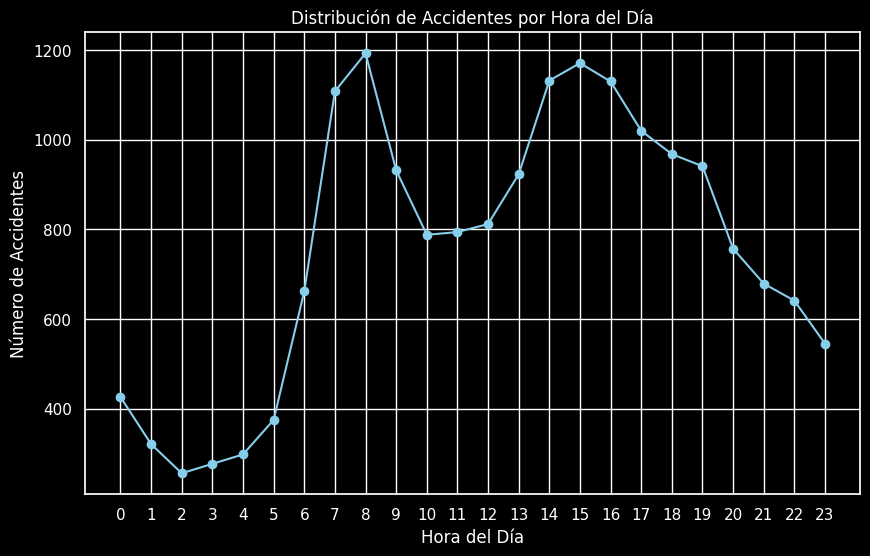

In [40]:
#Gráfico 3
# Crear un gráfico de líneas con todas las horas (0-23)
plt.figure(figsize=(10, 6))

# Gráfico de líneas para todas las horas
plt.plot(accidentes_por_hora.index, accidentes_por_hora.values, marker='o', linestyle='-', color='skyblue')

# Añadir títulos y etiquetas
plt.title('Distribución de Accidentes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Accidentes')

# Ajustar el rango de horas para que incluya todas las horas (0-23)
plt.xticks(ticks=range(24))

# Mostrar cuadrícula y gráfico
plt.grid(True)
plt.show()

<ipython-input-52-3591761f1099>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidentes['dia_semana'] = df_accidentes['incidencia_fecha_inicio'].dt.dayofweek


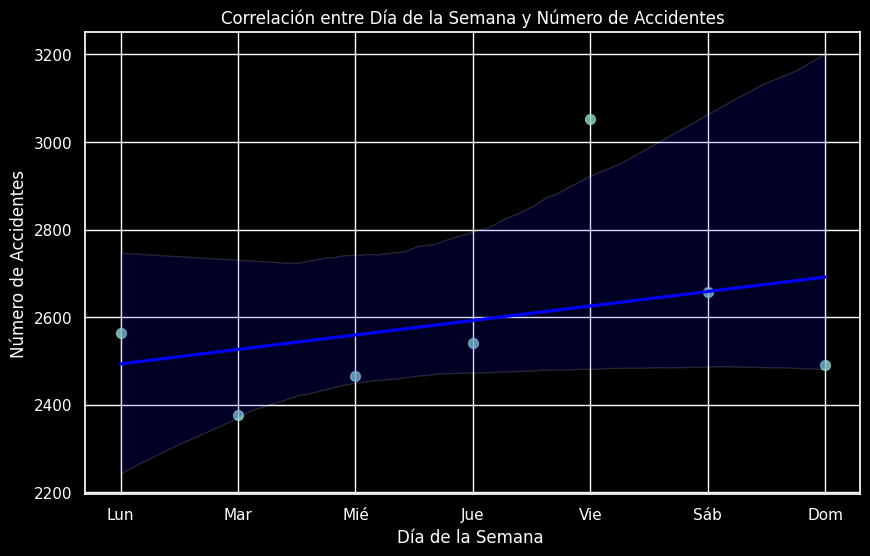

In [52]:
#Gráfico 4
# Filtrar solo los accidentes en 'df' y crear 'df_accidentes'
df_accidentes = df[df['es_accidente'] == 'Accidente']

# Extraer el día de la semana (0: Lunes, 6: Domingo)
df_accidentes['dia_semana'] = df_accidentes['incidencia_fecha_inicio'].dt.dayofweek

# Contar el número de accidentes por día de la semana
accidentes_por_dia_semana = df_accidentes['dia_semana'].value_counts().sort_index()

# Crear un DataFrame con los datos
correlacion_dia_semana_df = pd.DataFrame({
    'dia_semana': accidentes_por_dia_semana.index,
    'accidentes': accidentes_por_dia_semana.values
})

# Crear el gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Crear gráfico de dispersión con línea de regresión
sns.regplot(x='dia_semana', y='accidentes', data=correlacion_dia_semana_df, scatter_kws={'s':50}, line_kws={'color':'blue'})

# Título y etiquetas
plt.title('Correlación entre Día de la Semana y Número de Accidentes')
plt.xlabel('Día de la Semana ')
plt.ylabel('Número de Accidentes')

# Definir los nombres de los días de la semana
dias_semana_nombres = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']

# Ajustar los nombres de los días de la semana en el gráfico
plt.xticks(ticks=correlacion_dia_semana_df['dia_semana'], labels=dias_semana_nombres)

# Mostrar cuadrícula y gráfico
plt.grid(True)
plt.show()

<ipython-input-56-588080582588>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidentes['dia_semana'] = df_accidentes['incidencia_fecha_inicio'].dt.dayofweek
<ipython-input-56-588080582588>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidentes['hora_dia'] = df_accidentes['incidencia_fecha_inicio'].dt.hour


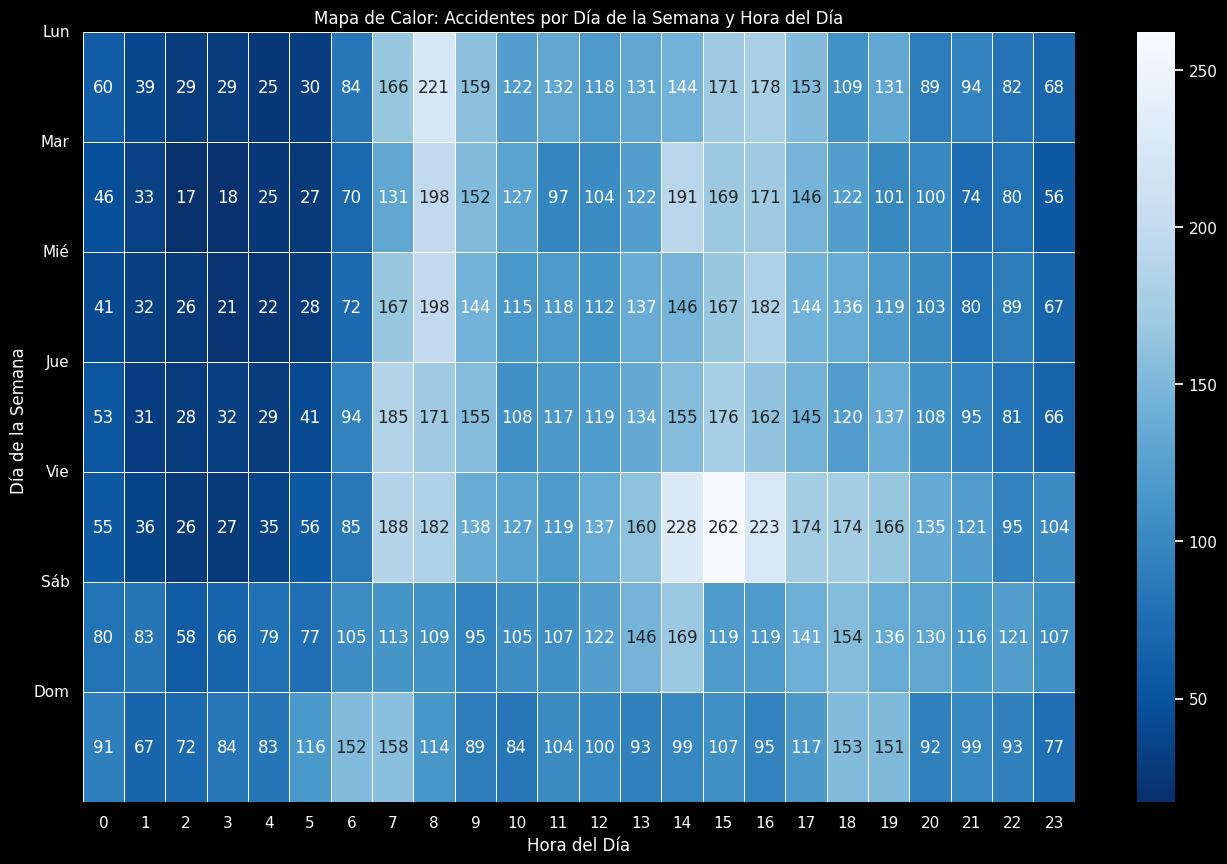

In [56]:
#Gráfico 5
# Filtrar solo los accidentes en 'df' y crear 'df_accidentes'
df_accidentes = df[df['es_accidente'] == 'Accidente']

# Extraer el día de la semana (0: Lunes, 6: Domingo)
df_accidentes['dia_semana'] = df_accidentes['incidencia_fecha_inicio'].dt.dayofweek

# Extraer la hora del día
df_accidentes['hora_dia'] = df_accidentes['incidencia_fecha_inicio'].dt.hour

# Agrupar por día de la semana y hora del día, contando los accidentes
heatmap_data = df_accidentes.groupby(['dia_semana', 'hora_dia'])['es_accidente'].count().unstack()

# Reemplazar NaN con 0 si hay valores faltantes
heatmap_data = heatmap_data.fillna(0)

# Crear el mapa de calor con valores numéricos en cada celda
plt.figure(figsize=(16, 10))  # Increased figure size (width, height)
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Generar el heatmap con anotaciones
sns.heatmap(heatmap_data, cmap="Blues_r", annot=True, fmt="d", linewidths=0.5)

# Ajustar las etiquetas
plt.title('Mapa de Calor: Accidentes por Día de la Semana y Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana ')
dias_semana_nombres = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
plt.yticks(ticks=range(7), labels=dias_semana_nombres, rotation=0)

# Mostrar el mapa de calor
plt.show()

<ipython-input-60-c9588bafbd81>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='numero_accidentes', y='carretera', data=top_accidentes_df, palette="Blues_r")


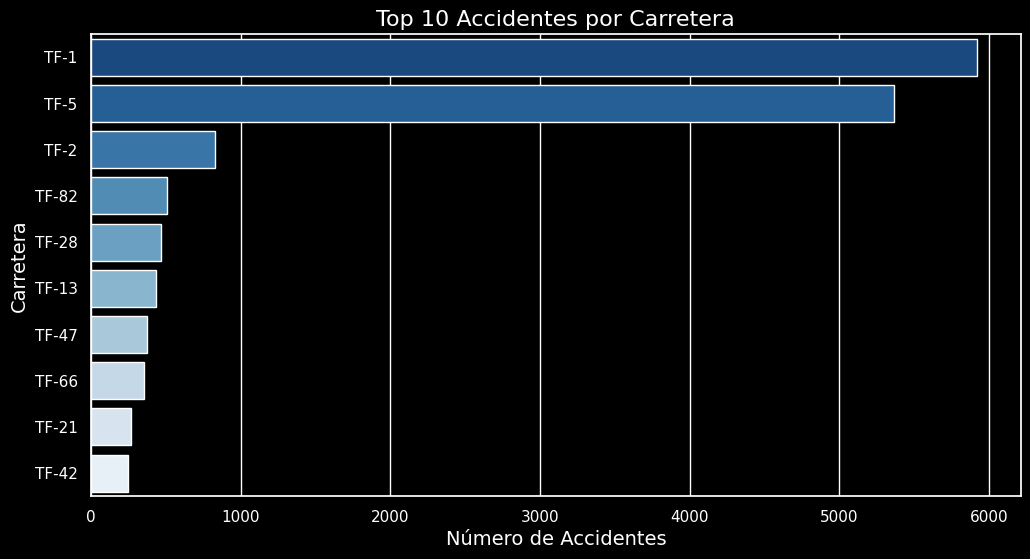

In [60]:
#Gráfico 6
# Filtrar solo los accidentes
df_accidentes = df[df['es_accidente'] == 'Accidente']

# Contar el número de accidentes por carretera
top_accidentes_por_carretera = df_accidentes['carretera_nombre'].value_counts().head(10)

# Crear un DataFrame para facilitar la visualización
top_accidentes_df = top_accidentes_por_carretera.reset_index()
top_accidentes_df.columns = ['carretera', 'numero_accidentes']

# Crear un gráfico de barras para visualizar los 10 accidentes más comunes por carretera
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Generar el gráfico de barras
sns.barplot(x='numero_accidentes', y='carretera', data=top_accidentes_df, palette="Blues_r")

# Títulos y etiquetas
plt.title('Top 10 Accidentes por Carretera', fontsize=16)
plt.xlabel('Número de Accidentes', fontsize=14)
plt.ylabel('Carretera', fontsize=14)

# Mostrar el gráfico
plt.show()



<ipython-input-62-0e1964b10e8d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='numero_accidentes', y='tramo', data=top_accidentes_tramo_df, palette="Blues_r")


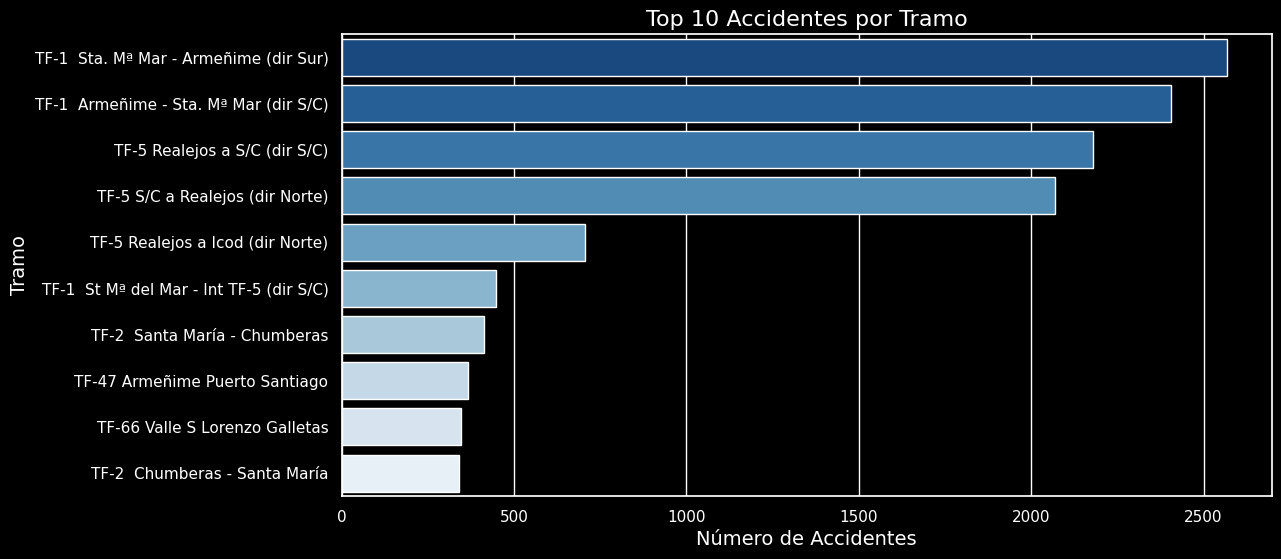

In [62]:
#Gráfico 7
# Filtrar solo los accidentes
df_accidentes = df[df['es_accidente'] == 'Accidente']

# Contar el número de accidentes por tramo
top_accidentes_por_tramo = df_accidentes['tramo_nombre'].value_counts().head(10)

# Crear un DataFrame para facilitar la visualización
top_accidentes_tramo_df = top_accidentes_por_tramo.reset_index()
top_accidentes_tramo_df.columns = ['tramo', 'numero_accidentes']

# Crear un gráfico de barras para visualizar los 10 accidentes más comunes por tramo
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Generar el gráfico de barras
sns.barplot(x='numero_accidentes', y='tramo', data=top_accidentes_tramo_df, palette="Blues_r")

# Títulos y etiquetas
plt.title('Top 10 Accidentes por Tramo', fontsize=16)
plt.xlabel('Número de Accidentes', fontsize=14)
plt.ylabel('Tramo', fontsize=14)

# Mostrar el gráfico
plt.show()

<ipython-input-65-0798597a02ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_incidencias_porcentaje.index, y=tipo_incidencias_porcentaje.values, palette="Blues_r")


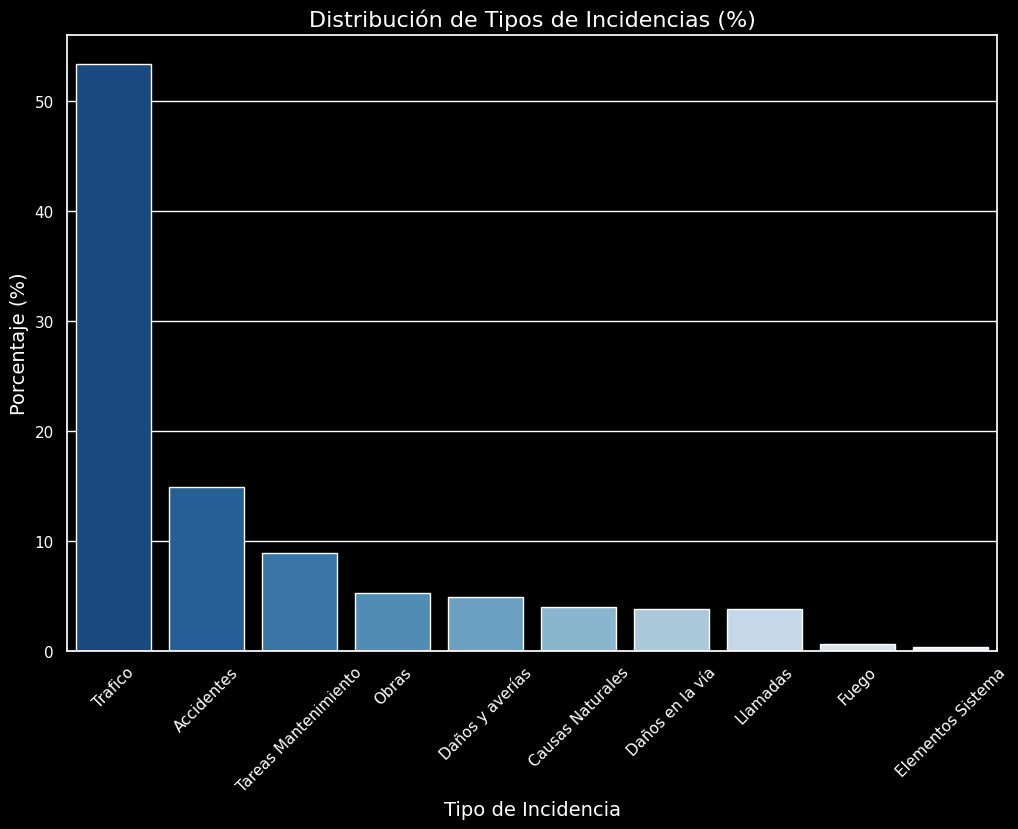

In [65]:
#Gráfico 8
# Crear un gráfico de barras para visualizar la proporción de tipos de incidencias
plt.figure(figsize=(12, 8))
sns.barplot(x=tipo_incidencias_porcentaje.index, y=tipo_incidencias_porcentaje.values, palette="Blues_r")

# Títulos y etiquetas
plt.title('Distribución de Tipos de Incidencias (%)', fontsize=16)
plt.xlabel('Tipo de Incidencia', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=14)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.show()

<ipython-input-66-6f007437a932>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='numero_incidencias', y='subtipo', data=top_incidencias_subtipo_df, palette="Blues_r")


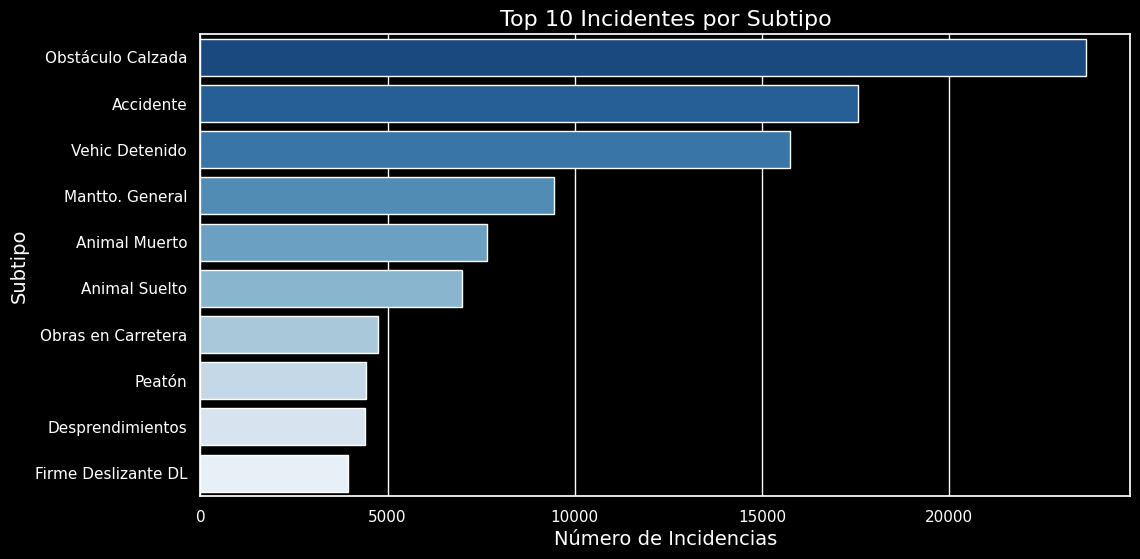

In [66]:
# Contar el número de incidentes por subtipo sin filtrar
top_incidencias_subtipo = df['incidencia_subtipo'].value_counts().head(10)

# Crear un DataFrame para facilitar la visualización
top_incidencias_subtipo_df = top_incidencias_subtipo.reset_index()
top_incidencias_subtipo_df.columns = ['subtipo', 'numero_incidencias']

# Crear un gráfico de barras para visualizar los 10 incidentes más comunes por subtipo
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Generar el gráfico de barras
sns.barplot(x='numero_incidencias', y='subtipo', data=top_incidencias_subtipo_df, palette="Blues_r")

# Títulos y etiquetas
plt.title('Top 10 Incidentes por Subtipo', fontsize=16)
plt.xlabel('Número de Incidencias', fontsize=14)
plt.ylabel('Subtipo', fontsize=14)

# Mostrar el gráfico
plt.show()

<ipython-input-72-4db09cb24881>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comunicacion_counts.values, y=comunicacion_counts.index, palette="Blues_r")


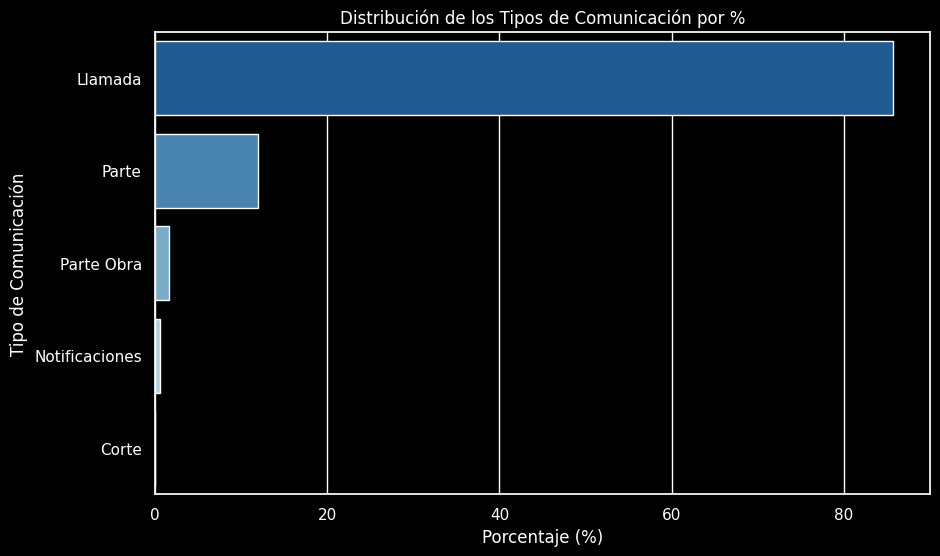

In [72]:
# Agrupamos y calculamos los porcentajes
comunicacion_counts = df['comunicacion_tipo'].value_counts(normalize=True) * 100

# Configurar tema oscuro
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=comunicacion_counts.values, y=comunicacion_counts.index, palette="Blues_r")

# Etiquetas y título
plt.xlabel('Porcentaje (%)')
plt.ylabel('Tipo de Comunicación')
plt.title('Distribución de los Tipos de Comunicación por %')

# Mostrar el gráfico
plt.show()

<ipython-input-77-3f8df2671f37>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentaje_incidencias_df['tipo_dia'], y=porcentaje_incidencias_df['porcentaje'], palette="Blues_r")


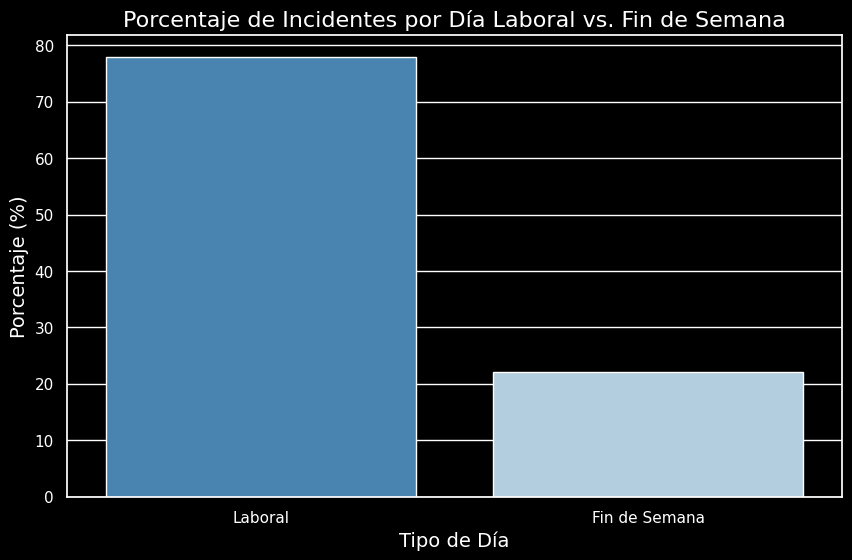

        tipo_dia  porcentaje
0        Laboral   77.978342
1  Fin de Semana   22.021658


In [77]:
# Crear una nueva columna que clasifique los días como "Laboral" o "Fin de Semana"
df['tipo_dia'] = df['incidencia_fecha_inicio'].dt.dayofweek.apply(lambda x: 'Fin de Semana' if x >= 5 else 'Laboral')

# Calcular el porcentaje de incidentes por tipo de día
porcentaje_incidencias_por_tipo_dia = df['tipo_dia'].value_counts(normalize=True) * 100

# Crear un DataFrame para visualizar los resultados
porcentaje_incidencias_df = porcentaje_incidencias_por_tipo_dia.reset_index()
porcentaje_incidencias_df.columns = ['tipo_dia', 'porcentaje']

# Crear un gráfico de barras para visualizar el porcentaje de incidentes por día laboral vs. fin de semana
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Generar el gráfico de barras
sns.barplot(x=porcentaje_incidencias_df['tipo_dia'], y=porcentaje_incidencias_df['porcentaje'], palette="Blues_r")

# Títulos y etiquetas
plt.title('Porcentaje de Incidentes por Día Laboral vs. Fin de Semana', fontsize=16)
plt.xlabel('Tipo de Día', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=14)

# Mostrar el gráfico
plt.show()

# Mostrar el DataFrame con los porcentajes
print(porcentaje_incidencias_df)

<ipython-input-80-ea219e4bcef6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidentes['tipo_dia'] = df_accidentes['incidencia_fecha_inicio'].dt.dayofweek.apply(lambda x: 'Fin de Semana' if x >= 5 else 'Laboral')
<ipython-input-80-ea219e4bcef6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentaje_accidentes_df['tipo_dia'], y=porcentaje_accidentes_df['porcentaje'], palette="Blues_r")


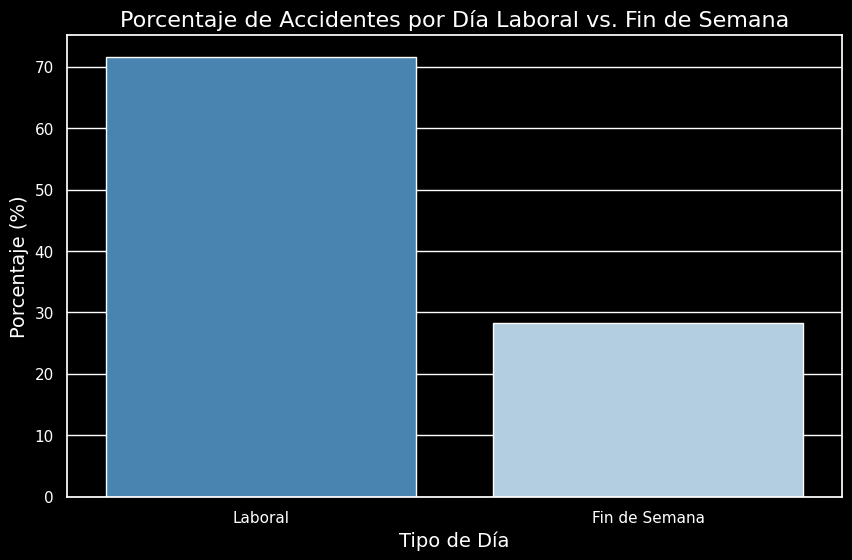

tipo_dia
Laboral          71.640311
Fin de Semana    28.359689
Name: proportion, dtype: float64


In [80]:
# Crear una nueva columna que clasifique los días como "Laboral" o "Fin de Semana" solo para accidentes
df_accidentes['tipo_dia'] = df_accidentes['incidencia_fecha_inicio'].dt.dayofweek.apply(lambda x: 'Fin de Semana' if x >= 5 else 'Laboral')

# Calcular el porcentaje de accidentes por tipo de día
porcentaje_accidentes_por_tipo_dia = df_accidentes['tipo_dia'].value_counts(normalize=True) * 100

# Crear un DataFrame para visualizar los resultados
porcentaje_accidentes_df = porcentaje_accidentes_por_tipo_dia.reset_index()
porcentaje_accidentes_df.columns = ['tipo_dia', 'porcentaje']

# Crear un gráfico de barras para visualizar el porcentaje de accidentes por día laboral vs. fin de semana
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Generar el gráfico de barras
sns.barplot(x=porcentaje_accidentes_df['tipo_dia'], y=porcentaje_accidentes_df['porcentaje'], palette="Blues_r")

# Títulos y etiquetas
plt.title('Porcentaje de Accidentes por Día Laboral vs. Fin de Semana', fontsize=16)
plt.xlabel('Tipo de Día', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=14)

# Mostrar el gráfico
plt.show()
# Mostrar el DataFrame con los porcentajes
print(porcentaje_accidentes_por_tipo_dia)